### Installing Google Vision client lib

In [1]:
import os, signal

def restart_runtime():
  os.kill(os.getpid(), signal.SIGSTOP)

!pip install --upgrade google-cloud-vision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Imports the Google Cloud client library
from google.cloud import vision

# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Setting up authentication

In [3]:
# Setup Environment Variable - Vision AI application credentials 
path = "/content/drive/MyDrive/0 - UEB - Ingeniería de Sistemas - Semestres/9 Noveno Semestre/Sistemas Inteligentes/Corte 2/Actividades/sistemas-inteligentes-visionai-dda79b08a4ae.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path

### Using Google Vision client library

**Step 1: Obtain an image**

In [4]:
from skimage import io
import matplotlib.pyplot as plt
def show_image(image_uri):
  image = io.imread(image_uri)
  plt.imshow(image)
  plt.show()

**Step 2: Web Annotations**

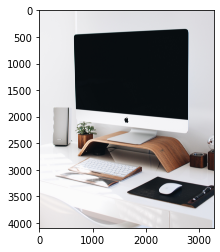


10 Pages with matching images retrieved
Url   : https://www.pinterest.com/pin/719731584180614635/
Url   : https://www.pinterest.com/laneyelizabeth1/aesthetic/
Url   : https://www.pinterest.com/pin/746542075714210165/
Url   : https://unsplash.com/photos/qr4d407hSjo
Url   : https://unsplash.com/photos/6IJQRYlWz0U
Url   : https://unsplash.com/photos/wWZ57knMQY8
Url   : https://www.computation.ca/mac-repair-hamilton/
Url   : https://www.hdwallpaperslife.com/imac-desk-setup-wallpapers.html
Url   : https://www.kontyyoga.com/gameroom-for-mac-k.html
Url   : https://www.wallpaperflare.com/search?wallpaper=desktop+setup

10 Full Matches found: 
Url  : https://altair-solution.com/integrationar/img/pics/pic21.jpg
Url  : https://geniustech.net/resources/img/product-2.jpg
Url  : https://www.play-germany.de/wp-content/uploads/2017/05/gabriel-beaudry-253365.jpg
Url  : https://www.capitalhunters.com.mx/img/welcome/product-2.jpg
Url  : https://upload.wikimedia.org/wikipedia/commons/8/8a/Gabriel_Beaudry

In [5]:
image_uri = 'https://upload.wikimedia.org/wikipedia/commons/8/8a/Gabriel_Beaudry%27s_desk_setup_%28Unsplash%29.jpg'
#image_uri = 'https://www.publicdomainpictures.net/pictures/280000/nahled/dog-with-human-body.jpg'

# Show image
show_image(image_uri)

def annotate(path):
    
    client = vision.ImageAnnotatorClient()

    if path.startswith('http') or path.startswith('gs:'):
        image = vision.Image()
        image.source.image_uri = path

    else:
        with io.open(path, 'rb') as image_file:
            content = image_file.read()

        image = vision.Image(content=content)

    web_detection = client.web_detection(image=image).web_detection

    return web_detection

def report(annotations):    
    if annotations.pages_with_matching_images:
        print('\n{} Pages with matching images retrieved'.format(
            len(annotations.pages_with_matching_images)))

        for page in annotations.pages_with_matching_images:
            print('Url   : {}'.format(page.url))

    if annotations.full_matching_images:
        print('\n{} Full Matches found: '.format(
              len(annotations.full_matching_images)))

        for image in annotations.full_matching_images:
            print('Url  : {}'.format(image.url))

    if annotations.partial_matching_images:
        print('\n{} Partial Matches found: '.format(
              len(annotations.partial_matching_images)))

        for image in annotations.partial_matching_images:
            print('Url  : {}'.format(image.url))

    if annotations.web_entities:
        print('\n{} Web entities found: '.format(
              len(annotations.web_entities)))

        for entity in annotations.web_entities:
            print('Score      : {}'.format(entity.score))
            print('Description: {}'.format(entity.description))


report(annotate(image_uri))

**Step 3: Logo detection**

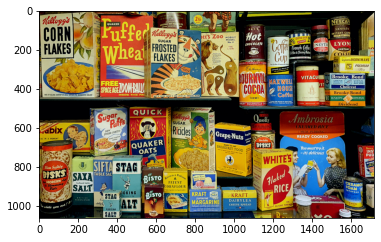

LOGOS DETECTADOS:

Kellogg's
Corn flakes
Great Clips
El Dorado Furniture


In [6]:
image_uri = 'https://upload.wikimedia.org/wikipedia/commons/b/b4/Museum_of_Brands_1950s_displays.jpg'

show_image(image_uri)

def detect_logos_uri(uri):    
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.Image()
    image.source.image_uri = uri

    response = client.logo_detection(image=image)
    logos = response.logo_annotations
    print('LOGOS DETECTADOS:\n')

    for logo in logos:
        print(logo.description)

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

detect_logos_uri(image_uri)

**Step 4: Detect Objects**

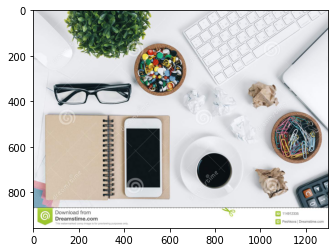

Number of objects found: 4

Glasses (confidence: 0.883301317691803)
Normalized bounding polygon vertices: 
 - (0.0493059866130352, 0.3268962800502777)
 - (0.3384625017642975, 0.3268962800502777)
 - (0.3384625017642975, 0.43886318802833557)
 - (0.0493059866130352, 0.43886318802833557)

Computer keyboard (confidence: 0.7553254961967468)
Normalized bounding polygon vertices: 
 - (0.49319493770599365, 0.0)
 - (0.9872982501983643, 0.0)
 - (0.9872982501983643, 0.3378993570804596)
 - (0.49319493770599365, 0.3378993570804596)

Houseplant (confidence: 0.6879103183746338)
Normalized bounding polygon vertices: 
 - (0.10187139362096786, 0.0020033936016261578)
 - (0.3979395925998688, 0.0020033936016261578)
 - (0.3979395925998688, 0.23254962265491486)
 - (0.10187139362096786, 0.23254962265491486)

Tableware (confidence: 0.6620180010795593)
Normalized bounding polygon vertices: 
 - (0.4964654743671417, 0.5666628479957581)
 - (0.7054898142814636, 0.5666628479957581)
 - (0.7054898142814636, 0.874630868

In [7]:
image_uri = "https://upload.wikimedia.org/wikipedia/commons/7/7c/Objects.jpg"
show_image(image_uri)

def localize_objects_uri(uri):

    from google.cloud import vision
    client = vision.ImageAnnotatorClient()

    image = vision.Image()
    image.source.image_uri = uri

    objects = client.object_localization(
        image=image).localized_object_annotations

    print('Number of objects found: {}'.format(len(objects)))
    for object_ in objects:
        print('\n{} (confidence: {})'.format(object_.name, object_.score))
        print('Normalized bounding polygon vertices: ')
        for vertex in object_.bounding_poly.normalized_vertices:
            print(' - ({}, {})'.format(vertex.x, vertex.y))

localize_objects_uri(image_uri)

**Step 5: Detect text in images**

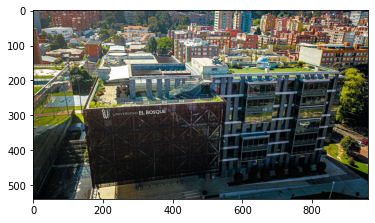

Texts:

"M
{U UNIVERSIDAD EL BOSQUE
HAD
OMG
ISA"
bounds: (93,65),(946,65),(946,420),(93,420)

"M"
bounds: (93,125),(99,125),(99,130),(93,130)

"{"
bounds: (194,285),(209,284),(210,308),(195,309)

"U"
bounds: (200,284),(213,283),(214,307),(201,308)

"UNIVERSIDAD"
bounds: (228,291),(298,287),(299,299),(229,303)

"EL"
bounds: (303,287),(317,286),(318,297),(304,298)

"BOSQUE"
bounds: (322,286),(378,283),(379,295),(323,298)

"HAD"
bounds: (582,72),(658,75),(657,109),(581,106)

"OMG"
bounds: (763,414),(777,413),(778,419),(764,420)

"ISA"
bounds: (947,66),(944,96),(934,95),(937,65)


In [8]:
image_uri = 'https://upload.wikimedia.org/wikipedia/commons/a/a9/Universidad_El_Bosque.jpg'
show_image(image_uri)

def detect_text(uri):   
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()
   
    image = vision.Image()
    image.source.image_uri = uri

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))


detect_text(image_uri)

**Step 6: Face dectection**

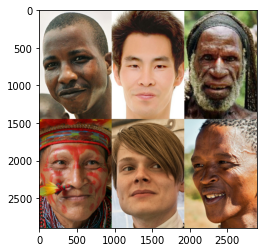

Faces:
anger: VERY_UNLIKELY
joy: LIKELY
surprise: VERY_UNLIKELY
face bounds: (837,1485),(2008,1485),(2008,2846),(837,2846)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (0,0),(1110,0),(1110,1459),(0,1459)
anger: VERY_UNLIKELY
joy: VERY_UNLIKELY
surprise: VERY_UNLIKELY
face bounds: (1820,3),(2895,3),(2895,1296),(1820,1296)
anger: VERY_UNLIKELY
joy: POSSIBLE
surprise: VERY_UNLIKELY
face bounds: (864,85),(2037,85),(2037,1450),(864,1450)
anger: VERY_UNLIKELY
joy: POSSIBLE
surprise: VERY_UNLIKELY
face bounds: (0,1264),(1163,1264),(1163,2829),(0,2829)
anger: VERY_UNLIKELY
joy: POSSIBLE
surprise: VERY_UNLIKELY
face bounds: (1712,1358),(2895,1358),(2895,2868),(1712,2868)


In [9]:
image_uri = 'https://upload.wikimedia.org/wikipedia/commons/6/67/Variety_of_male_human_faces_%28collage%29.jpg'
show_image(image_uri)

def detect_faces_uri(uri):
   
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.Image()
    image.source.image_uri = uri

    response = client.face_detection(image=image)
    faces = response.face_annotations

    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    print('Faces:')

    for face in faces:
        print("="*10)
        print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
        print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
        print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in face.bounding_poly.vertices])

        print('face bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
        
detect_faces_uri(image_uri)